In [73]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

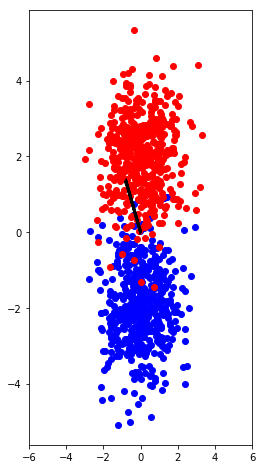

In [152]:
size=500
X0 = np.random.multivariate_normal([0, -2], np.identity(2), size=size) 
X1 = np.random.multivariate_normal([0, 2], np.identity(2), size=size)
plt.figure(figsize=(4, 8))
plt.xlim(-3, 3)
plt.xlim(-6, 6)
plt.plot(X0[:, 0], X0[:, 1], 'bo')
plt.plot(X1[:, 0], X1[:, 1], 'ro')
plt.arrow(0, 0, -0.79, 1.35, linewidth=3, zorder=100)
plt.show()
X = np.concatenate([X0, X1])
# y = tf.keras.utils.to_categorical(np.concatenate([np.zeros(size), np.ones(size)]))
y = np.concatenate([np.zeros(size), np.ones(size)]).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [125]:
model = tf.keras.Sequential()
model.add(layers.Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train)

750/750 [==============================] - 0s 188us/sample - loss: 0.1649 - accuracy: 0.9547


In [128]:
np.sum(model.predict_classes(X_test)[:, 0] != y_test)

11

In [133]:
w, b = model.layers[0].get_weights()

In [132]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [139]:
sum(sigmoid(X_test.dot(w) + b)< 0.5)

array([117])

In [147]:
np.sum(1*(sigmoid(X_test.dot(w) + b) > 0.5).reshape(-1,) == y_test)/len

237

In [144]:
y_test

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1])

In [148]:
z = model.predict_classes(X_test)[:, 0]

In [150]:
z == 1*(sigmoid(X_test.dot(w) + b) > 0.5).reshape(-1,)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [153]:
z = model.predict_proba(X_test)[:, 0]

In [155]:
z[:10]

array([0.11225644, 0.08977142, 0.0219672 , 0.17097151, 0.9249569 ,
       0.94289434, 0.07321826, 0.0491465 , 0.00703418, 0.09519604],
      dtype=float32)

In [157]:
sigmoid(X_test.dot(w) + b)[:10].reshape(-1)

array([0.11225642, 0.08977143, 0.0219672 , 0.17097152, 0.92495693,
       0.94289438, 0.07321824, 0.04914647, 0.0070342 , 0.09519603])